# Yucatan Pennisula Hurricanes
### Week 4 - Discussion Section

# 1. Archive exploration

**Description:** This data set explores teh ecological impacts of hurricanes across the Yucatan Pennisula since 1851 to 2000, using computer modeling.

**Date of Access:** 10/24/25

**Link:** https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-hfr.71.23

**Citation:**

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).

# 2. Data loading and preliminary exploration

In [3]:
import pandas as pd

In [4]:
# Saving dataset url for import.
url ='https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469'

hurricane = pd.read_csv(url)

In [5]:
# View the first 5 rows of the hurricane dataset
hurricane.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


#### Obtain preliminary information and explore this data frame using pandas methods.

In [ ]:
# Preliminary data exploration
print(hurricane.isna().sum())
print(hurricane.shape)
print(hurricane.dtypes)

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64
(105, 8)
code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object


# 3. Brainstorm
In this session we want to answer the following question:

#### How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

##### a. Individually, write down step-by-step instructions on how you would wrangle the df data frame to answer the question. Do not code anything yet. Remember: It’s okay if you don’t know how to code each step. The important thing is to have an idea of what you’d like to do.

In [9]:
hurricane.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


1. Filter data frame for just ss = 5 (or groupby ss)
2. Count method to see how many (value_counts)
3. Make duration column where we do edn.date - start.date (check data type)

# 4. Data Wrangling

In [11]:
# Filter for just hurricanes that are category 5 and saving as its own df.
cat5 = hurricane[hurricane['ss'] == 5]

In [ ]:
# Counting the number of category 5 hurricanes.
cat5.ss.count()

# The better way
len(cat5)

4

There have been four hurricanes with Saffir-Simpson category 5.

In [ ]:
# What is the data type pf the date column
cat5['start.date']

76     1955-09-28
96     1980-08-07
98     1988-09-14
103    1998-10-27
Name: start.date, dtype: object

In [21]:
# Changing date variables to be DateTime objects
cat5['start.date'] = pd.to_datetime(cat5['start.date'])
cat5['end.date'] = pd.to_datetime(cat5['end.date'])

/tmp/ipykernel_3286294/2474275701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['start.date'] = pd.to_datetime(cat5['start.date'])
/tmp/ipykernel_3286294/2474275701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['end.date'] = pd.to_datetime(cat5['end.date'])


In [ ]:
# Creating a duration column.
cat5['duration'] = cat5['end.date'] - cat5['start.date']

/tmp/ipykernel_3286294/764041551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['duration'] = cat5['end.date'] - cat5['start.date']


In [23]:
cat5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


**Interpretation:** Most category 5 hurricanes lasted for a day, with on eof the four being less than a day.

# 5. Visualize Saffir-Simpson categories across time

In [52]:
import matplotlib.pyplot as plt

In [44]:
hurricane.loc[:, 'start.date'] = pd.to_datetime(hurricane['start.date'])

hurricane['year'] = hurricane['start.date'].dt.year


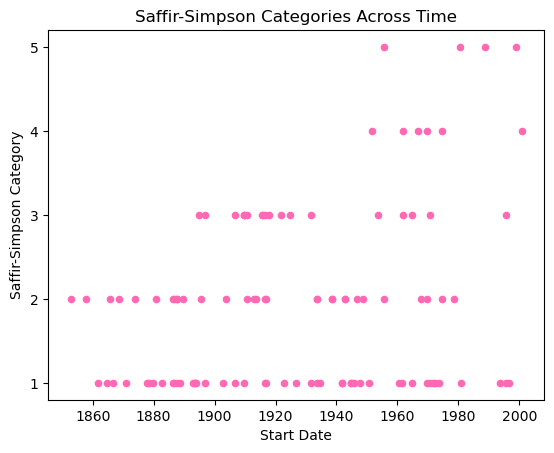

In [46]:
plot = hurricane.plot(kind='scatter',
               x = 'start.date',
               y = 'ss',
               xlabel = 'Start Date',
               ylabel = 'Saffir-Simpson Category',
               title='Saffir-Simpson Categories Across Time',
               color = 'hotpink').set_yticks([1, 2, 3, 4, 5])

Text(0, 0.5, 'Hurricane Category')

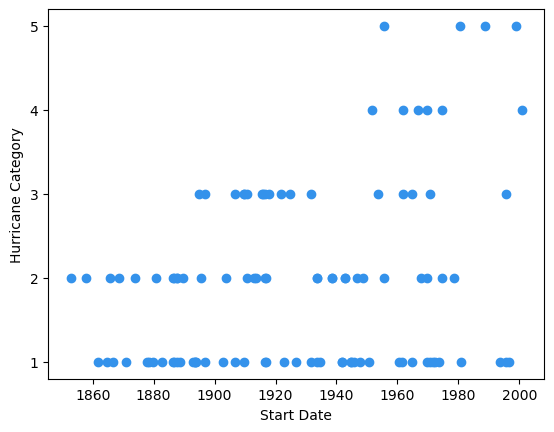

In [56]:
# fig, ax = plt.subplots(figsize = (12, 5))

plt.scatter(hurricane['start.date'], hurricane['ss'],
            c = '#3492eb')

plt.yticks([1, 2, 3, 4, 5])

plt.xlabel('Start Date')
plt.ylabel('Hurricane Category')